# How do I create plots in pandas?
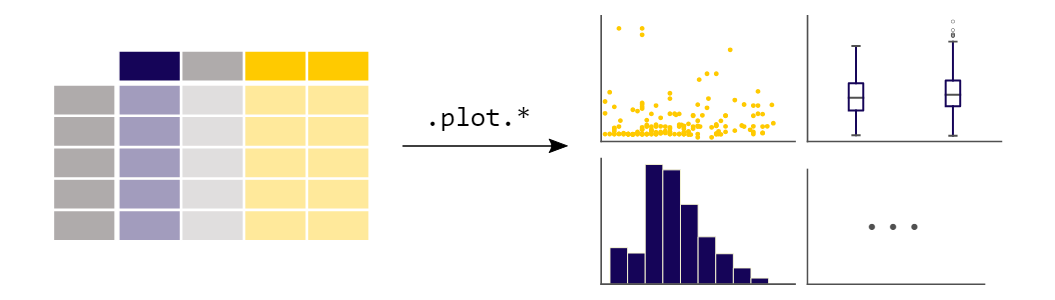

In [4]:
# As always, let's ensure we first import the necessary packages:
import pandas as pd

import matplotlib.pyplot as plt

Then, let's read in our data, define the first column as index values (integer positions of each row) and convert the dates to Timestamp objects.

In [7]:
air_quality = pd.read_csv("air_quality_no2.csv", index_col=0, parse_dates=True)

## 📌 Using `index_col` and `parse_dates` in `read_csv`

When reading a CSV file into a pandas `DataFrame`, you can use the `index_col` and `parse_dates` parameters to optimize data handling:

- **`index_col`**: This sets a specific column (e.g., the first column, `0`) as the index of the resulting `DataFrame`, similar to how a **table of contents** helps organize a book for quick reference.
- **`parse_dates`**: This converts date columns into pandas `Timestamp` objects, making them **date-aware** and allowing for powerful time-based operations, much like how a **calendar app** understands and organizes dates automatically.

These parameters together ensure that our dataset is structured efficiently, with proper indexing and correctly formatted date values for easy analysis.

In [8]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


Let's say that we just want a *quick visual look at the data*...

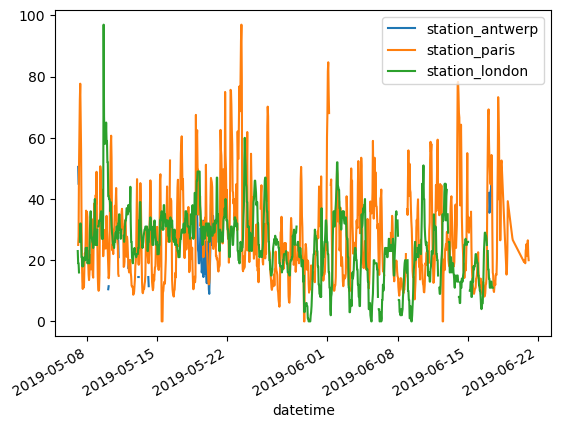

In [10]:
air_quality.plot()
plt.show()

**Note:** With a DataFrame, pandas creates one line plot for each column with numeric data by default. 

I want to plot only the columns of the data table with the data from London. 

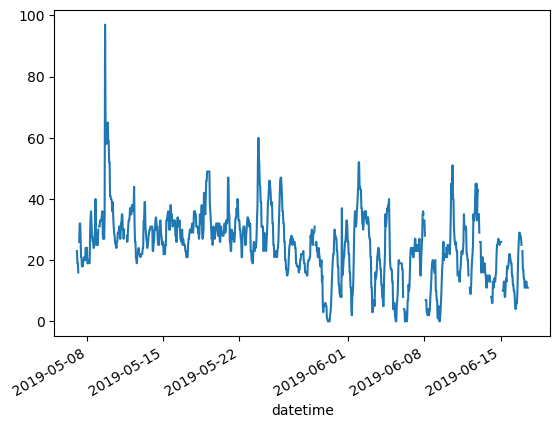

In [12]:
air_quality["station_london"].plot()
plt.show()

**Note:** To plot a specific column, simply use the selection method of the subset data tutorial in combination with the plot() method. Hence, the plot() method works on both Series and DataFrame. 

Now, let's say that we want to **Compare** the NO2 values measured in *Paris vs. London...*

<Axes: xlabel='station_london', ylabel='station_paris'>

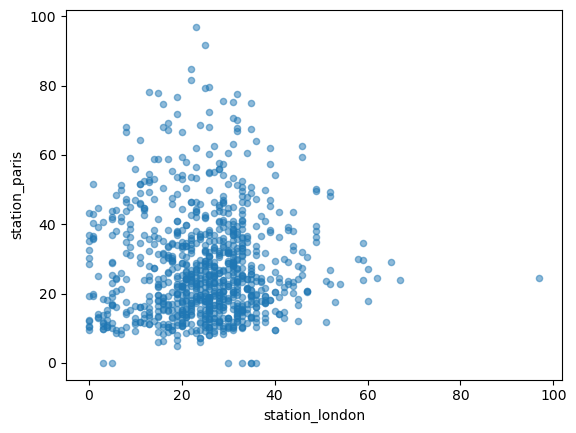

In [14]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

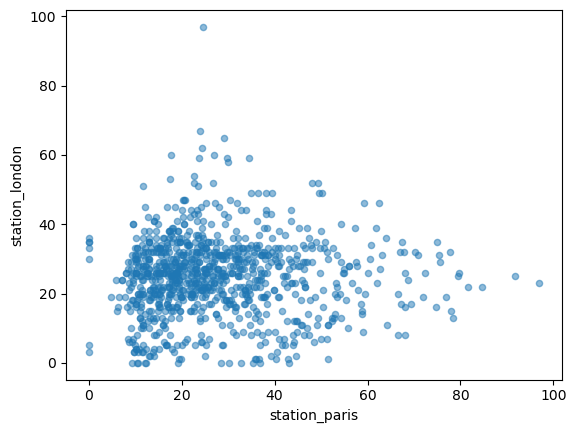

In [16]:
air_quality.plot.scatter(x="station_paris", y="station_london", alpha=0.5)
plt.show()

Note that with jupyter, it isn't strictly necessary to explicitly write `plot.show()` but it's good practice to include it.

Apart from the default `line` plot when using the `plot` function, a number of alternatives are available to plot data. 

We'll just use some standard Python to get a nice overview of the available plot methods:


In [20]:
for method_name in dir(air_quality.plot):
    if not method_name.startswith("_"):
        print(method_name)  # Display available plotting methods


area
bar
barh
box
density
hexbin
hist
kde
line
pie
scatter


#### If you're interested in how this selection block works: 
1. **`dir(air_quality.plot)`**:  
   - The `dir()` function lists all attributes (methods and properties) of the `air_quality.plot` object.  
   - `air_quality.plot` is likely a pandas `DataFrame.plot` accessor, which provides various plotting methods.

2. **`for method_name in dir(air_quality.plot)`**:  
   - This is a **list comprehension-style loop** that iterates over each method available in `air_quality.plot`.

3. **`if not method_name.startswith("_")`**:  
   - This filters out methods that start with an underscore (`_`).  
   - In Python, methods starting with `_` are usually **private or internal methods** that are not meant for direct use.


### Note

In many development environments as well as `IPython` and `Jupyter Notebook`, use the `TAB` button to get an overview of the available methods, for example `air_quality.plot. + TAB`.

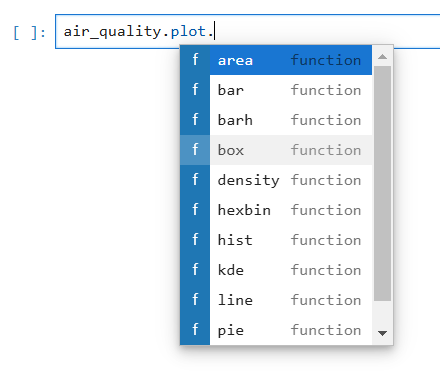

One of the options is  `DataFrame.plot.box()`

* this refers to a box plot
* this is applicable in the ocntext of our air quality data...

<Axes: >

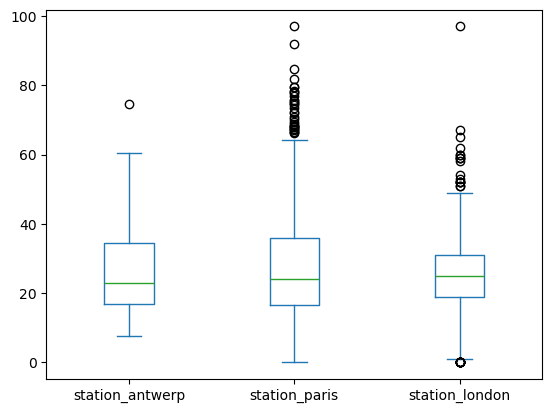

In [21]:
air_quality.plot.box()

Now, I want each of the columns from our DF in a separate plot...

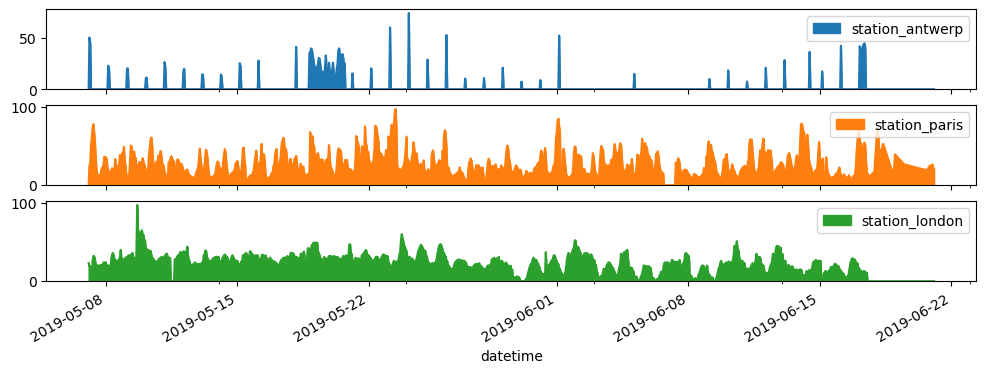

In [22]:
axs = air_quality.plot.area(figsize=(12,4), subplots=True)

Separate **subplots** for each of the data columns are supported  by the `subplots` argument of the `plot` function(s).

**Note**: The built-in options for each of the pandas plot functions are worth reviewing. 

Now, let's look into customzing, extending, or saving the result. 


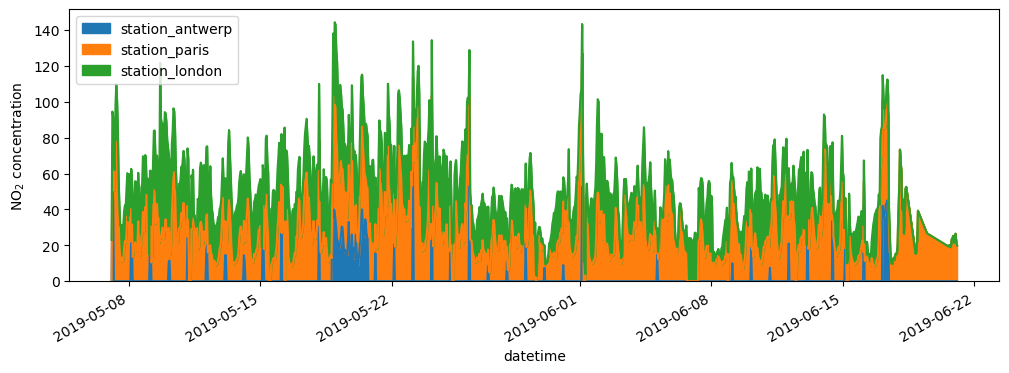

In [30]:
fig, axs = plt.subplots(figsize=(12,4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")

* Each of the plot objects created by pandas is a Matplotlib object.
* As MatplotLib porvides plenty of options for plot customization,
    * Making the link between pandas and MatplotLib explicit enables all the power of MatplotLib to the plot
i.e.:

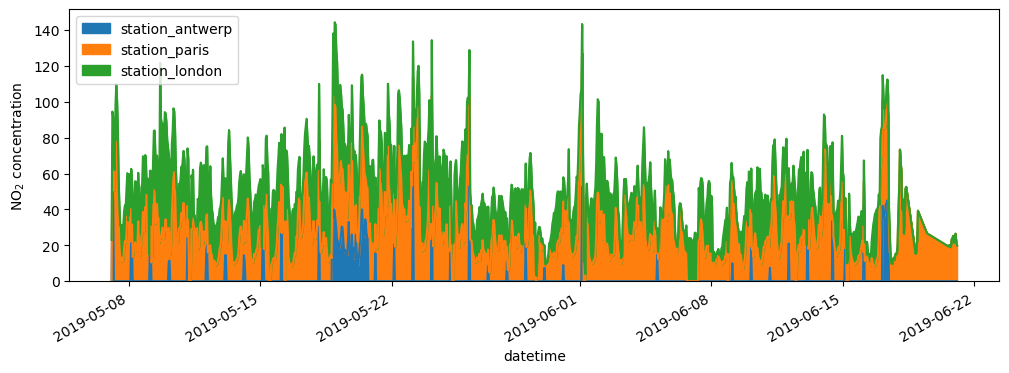

In [31]:
fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty Matplotlib Figure and Axes
air_quality.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("NO$_2$ concentration")          # Do any Matplotlib customization you like
fig.savefig("no2_concentrations.png")           # Save the Figure/Axes using the existing Matplotlib method.
plt.show()                                      # Display the plot

REMEMBER: 
* The `.plot.*` methods are applicable on both `Series` and `DataFrames.`
* By default, each of the columns is plotted as a different element (line, boxplot,…).
* Any plot created by pandas is a Matplotlib object.